<a href="https://colab.research.google.com/github/chimpiriudaykiran/RoadAccidentSeverity/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade scikit-learn==1.2.2
!pip uninstall bigframes
!pip install scikit-learn==1.1.3

  Using cached scikit_learn-1.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U imbalanced-learn

Initial Dataset

In [ ]:
import os
import pandas as pd
import numpy as np
import warnings
import sys
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")



initial_dataset = pd.read_excel('/content/drive/MyDrive/Road Accident Data_new.xlsx')
initial_dataset.tail()


,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
307968,201091NM01760,2022-02-18,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,None,...,2,1,Northern,Dry,Single carriageway,60,07:00:00,Rural,Fine no high winds,Car
307969,201091NM01881,2022-02-21,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,None,...,1,1,Northern,Frost or ice,Single carriageway,60,03:00:00,Rural,Fine no high winds,Car
307970,201091NM01935,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,None,...,1,3,Northern,Frost or ice,Single carriageway,30,09:38:00,Rural,Fine no high winds,Car
307971,201091NM01964,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,None,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25:00,Rural,Fine no high winds,Motorcycle over 500cc
307972,201091NM02142,2022-02-28,Sunday,Give way or uncontrolled,T or staggered junction,Serious,57.575210,Daylight,Highland,Other object on road,...,1,1,Northern,Wet or damp,Dual carriageway,60,15:45:00,Rural,Snowing no high winds,Car


In [ ]:
initial_dataset.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


In [ ]:
# Assuming initial_dataset is your DataFrame
dataset_shape = initial_dataset.shape

# Print the shape
print("Shape of the dataset:", dataset_shape)

Shape of the dataset: (307973, 21)


In [ ]:
initial_dataset.isnull().sum()

Accident_Index                   0
Accident Date                    0
Day_of_Week                      0
Junction_Control                 0
Junction_Detail                  0
Accident_Severity                0
Latitude                         0
Light_Conditions                 0
Local_Authority_(District)       0
Carriageway_Hazards              3
Longitude                        0
Number_of_Casualties             0
Number_of_Vehicles               0
Police_Force                     0
Road_Surface_Conditions        317
Road_Type                     1534
Speed_limit                      0
Time                            17
Urban_or_Rural_Area              0
Weather_Conditions            6057
Vehicle_Type                     0
dtype: int64

Converting null vales by adding mean

In [ ]:
for column in initial_dataset.columns:
    most_frequent_value = initial_dataset[column].mode()[0]
    initial_dataset[column].fillna(most_frequent_value, inplace=True)
initial_dataset.isnull().sum()

Accident_Index                0
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

In [ ]:
# Find duplicate rows (considering all columns)
duplicate_rows = initial_dataset[initial_dataset.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Optionally, print the duplicate rows to inspect them
print(duplicate_rows)

Number of duplicate rows: 1
      Accident_Index Accident Date Day_of_Week              Junction_Control  \
50483  2010000000000    2021-01-06     Tuesday  Data missing or out of range   

                           Junction_Detail Accident_Severity   Latitude  \
50483  Not at junction or within 20 metres            Slight  53.648498   

      Light_Conditions Local_Authority_(District) Carriageway_Hazards  ...  \
50483         Daylight                 Calderdale                None  ...   

       Number_of_Casualties  Number_of_Vehicles    Police_Force  \
50483                     1                   1  West Yorkshire   

      Road_Surface_Conditions           Road_Type Speed_limit      Time  \
50483            Frost or ice  Single carriageway          50  16:35:00   

      Urban_or_Rural_Area  Weather_Conditions Vehicle_Type  
50483               Rural  Fine no high winds          Car  

[1 rows x 21 columns]


In [ ]:
initial_dataset.drop_duplicates(inplace=True, keep='first')

# Check the shape of the DataFrame after removing duplicates
print(f"Shape of dataset after removing duplicates: {initial_dataset.shape}")

Shape of dataset after removing duplicates: (307972, 21)


Finding unique values

In [ ]:
transformed_dataset=initial_dataset.copy()
features_to_drop = ['Accident_Index', 'Accident Date', 'Latitude', 'Longitude', 'Local_Authority_(District)', 'Police_Force','Time']
transformed_dataset.drop(features_to_drop, axis=1, inplace=True)

In [ ]:
# Assuming initial_dataset is your DataFrame
selected_features = ['Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Accident_Severity',
                      'Light_Conditions',  'Carriageway_Hazards',
                      'Number_of_Casualties', 'Number_of_Vehicles',  'Road_Surface_Conditions',
                      'Road_Type', 'Speed_limit', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']

for feature in selected_features:
    unique_values = transformed_dataset[feature].unique()
    print(f"Unique values for {feature}:\n{unique_values}\n")

Unique values for Day_of_Week:
['Thursday' 'Monday' 'Sunday' 'Tuesday' 'Friday' 'Wednesday' 'Saturday']

Unique values for Junction_Control:
['Give way or uncontrolled' 'Auto traffic signal'
 'Data missing or out of range' 'Authorised person' 'Stop sign'
 'Not at junction or within 20 metres' 'Auto traffic sigl']

Unique values for Junction_Detail:
['T or staggered junction' 'Crossroads'
 'Not at junction or within 20 metres' 'Roundabout' 'Mini-roundabout'
 'More than 4 arms (not roundabout)' 'Private drive or entrance'
 'Slip road' 'Other junction']

Unique values for Accident_Severity:
['Serious' 'Slight' 'Fetal' 'Fatal']

Unique values for Light_Conditions:
['Daylight' 'Darkness - lights lit' 'Darkness - lighting unknown'
 'Darkness - lights unlit' 'Darkness - no lighting']

Unique values for Carriageway_Hazards:
['None' 'Pedestrian in carriageway - not injured' 'Other object on road'
 'Any animal in carriageway (except ridden horse)' 'Previous accident'
 'Vehicle load on road']

Un

In [ ]:
day_of_week_mapping = {'Thursday': 0, 'Monday': 1, 'Sunday': 2, 'Tuesday': 3, 'Friday': 4, 'Wednesday': 5, 'Saturday': 6}
junction_control_mapping = {'Give way or uncontrolled': 0, 'Auto traffic signal': 1, 'Data missing or out of range': 2,
                            'Authorised person': 3, 'Stop sign': 4, 'Not at junction or within 20 metres': 5,
                            'Auto traffic sigl': 6}
junction_detail_mapping = {'T or staggered junction': 0, 'Crossroads': 1,
                            'Not at junction or within 20 metres': 2, 'Roundabout': 3, 'Mini-roundabout': 4,
                            'More than 4 arms (not roundabout)': 5, 'Private drive or entrance': 6,
                            'Slip road': 7, 'Other junction': 8}
accident_severity_mapping = {'Serious': 0, 'Slight': 1, 'Fetal': 2, 'Fatal': 3}
light_conditions_mapping = {'Daylight': 0, 'Darkness - lights lit': 1, 'Darkness - lighting unknown': 2,
                            'Darkness - lights unlit': 3, 'Darkness - no lighting': 4}
carriageway_hazards_mapping = {'None': 0, 'Pedestrian in carriageway - not injured': 1, 'Other object on road': 2,
                               'Any animal in carriageway (except ridden horse)': 3, 'Previous accident': 4,
                               'Vehicle load on road': 5}
road_surface_conditions_mapping = {'Dry': 0, 'Wet or damp': 1, 'Frost or ice': 2, 'Snow': 3, 'Flood over 3cm. deep': 4}
road_type_mapping = {'One way street': 0, 'Single carriageway': 1, 'Dual carriageway': 2, 'Roundabout': 3, 'Slip road': 4}
urban_rural_area_mapping = {'Urban': 0, 'Rural': 1}
weather_conditions_mapping = {'Fine no high winds': 0, 'Other': 1, 'Raining no high winds': 2,
                               'Snowing no high winds': 3, 'Fine + high winds': 4, 'Raining + high winds': 5,
                               'Snowing + high winds': 6, 'Fog or mist': 7}
vehicle_type_mapping = {'Car': 0, 'Taxi/Private hire car': 1, 'Motorcycle over 500cc': 2,
                        'Van / Goods 3.5 tonnes mgw or under': 3, 'Goods over 3.5t. and under 7.5t': 4,
                        'Motorcycle 125cc and under': 5, 'Motorcycle 50cc and under': 6,
                        'Bus or coach (17 or more pass seats)': 7, 'Goods 7.5 tonnes mgw and over': 8,
                        'Other vehicle': 9, 'Motorcycle over 125cc and up to 500cc': 10,
                        'Agricultural vehicle': 11, 'Minibus (8 - 16 passenger seats)': 12, 'Pedal cycle': 13,
                        'Ridden horse': 14}

# Apply mapping to each respective column
transformed_dataset['Day_of_Week'] = transformed_dataset['Day_of_Week'].map(day_of_week_mapping)
transformed_dataset['Junction_Control'] = transformed_dataset['Junction_Control'].map(junction_control_mapping)
transformed_dataset['Junction_Detail'] = transformed_dataset['Junction_Detail'].map(junction_detail_mapping)
transformed_dataset['Accident_Severity'] = transformed_dataset['Accident_Severity'].map(accident_severity_mapping)
transformed_dataset['Light_Conditions'] = transformed_dataset['Light_Conditions'].map(light_conditions_mapping)
transformed_dataset['Carriageway_Hazards'] = transformed_dataset['Carriageway_Hazards'].map(carriageway_hazards_mapping)
transformed_dataset['Road_Surface_Conditions'] = transformed_dataset['Road_Surface_Conditions'].map(road_surface_conditions_mapping)
transformed_dataset['Road_Type'] = transformed_dataset['Road_Type'].map(road_type_mapping)
transformed_dataset['Urban_or_Rural_Area'] = transformed_dataset['Urban_or_Rural_Area'].map(urban_rural_area_mapping)
transformed_dataset['Weather_Conditions'] = transformed_dataset['Weather_Conditions'].map(weather_conditions_mapping)
transformed_dataset['Vehicle_Type'] = transformed_dataset['Vehicle_Type'].map(vehicle_type_mapping)

# Display the resulting DataFrame
print(transformed_dataset.head())


   Day_of_Week  Junction_Control  Junction_Detail  Accident_Severity  \
0            0                 0                0                  0   
1            1                 0                1                  0   
2            2                 0                0                  1   
3            1                 1                0                  0   
4            3                 1                1                  0   

   Light_Conditions  Carriageway_Hazards  Number_of_Casualties  \
0                 0                    0                     1   
1                 0                    0                    11   
2                 0                    0                     1   
3                 0                    0                     1   
4                 1                    0                     1   

   Number_of_Vehicles  Road_Surface_Conditions  Road_Type  Speed_limit  \
0                   2                        0          0           30   
1                   2 

In [ ]:
transformed_dataset.shape

(307972, 14)

In [ ]:
transformed_dataset.isnull().sum()

Day_of_Week                0
Junction_Control           0
Junction_Detail            0
Accident_Severity          0
Light_Conditions           0
Carriageway_Hazards        0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Speed_limit                0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [ ]:
# Display unique values for each feature
for column in transformed_dataset.columns:
    unique_values = transformed_dataset[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for Day_of_Week:
[0 1 2 3 4 5 6]

Unique values for Junction_Control:
[0 1 2 3 4 5 6]

Unique values for Junction_Detail:
[0 1 2 3 4 5 6 7 8]

Unique values for Accident_Severity:
[0 1 2 3]

Unique values for Light_Conditions:
[0 1 2 3 4]

Unique values for Carriageway_Hazards:
[0 1 2 3 4 5]

Unique values for Number_of_Casualties:
[ 1 11  3  2  4  5  6 10  8  7  9 13 12 14 16 18 15 19 21 17 27 48 40 24
 26 22 42 43]

Unique values for Number_of_Vehicles:
[ 2  1  3  4  5  9  6  8  7 10 16 13 14 11 12 32 19]

Unique values for Road_Surface_Conditions:
[0 1 2 3 4]

Unique values for Road_Type:
[0 1 2 3 4]

Unique values for Speed_limit:
[30 20 50 40 70 60 10 15]

Unique values for Urban_or_Rural_Area:
[0 1]

Unique values for Weather_Conditions:
[0 1 2 3 4 5 6 7]

Unique values for Vehicle_Type:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]



In [ ]:
# Original data types
original_dtypes = initial_dataset.dtypes

# Prepare a comparison DataFrame for all columns
common_columns = set(initial_dataset.columns).intersection(transformed_dataset.columns)
comparison = pd.DataFrame({
    'Column': list(common_columns),
    'Original Data Type': [original_dtypes[col] for col in common_columns],
    'Transformed Data Type': [transformed_dataset[col].dtype for col in common_columns]
})

# Display the comparison DataFrame
comparison

,Column,Original Data Type,Transformed Data Type
0,Vehicle_Type,object,int64
1,Carriageway_Hazards,object,int64
2,Number_of_Casualties,int64,int64
3,Day_of_Week,object,int64
4,Number_of_Vehicles,int64,int64
5,Speed_limit,int64,int64
6,Accident_Severity,object,int64
7,Road_Surface_Conditions,object,int64
8,Road_Type,object,int64
9,Light_Conditions,object,int64


target visualization

<Axes: xlabel='Accident_Severity', ylabel='count'>

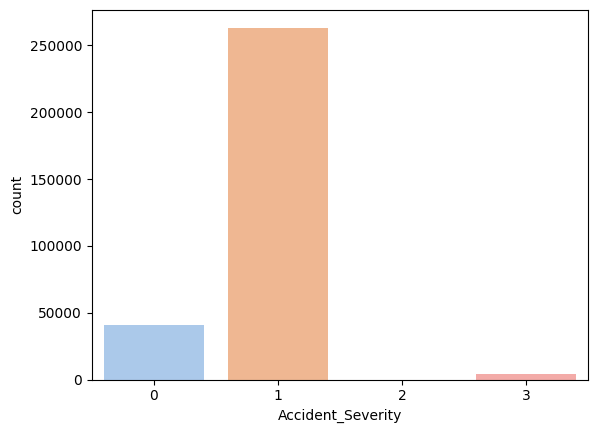

In [ ]:
import seaborn as sns
sns.countplot(x='Accident_Severity',data=transformed_dataset,palette="pastel")

EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target variable 'y' and features 'X'
y = transformed_dataset['Accident_Severity']
X = transformed_dataset.drop('Accident_Severity', axis=1)

# Descriptive statistics for numerical features in X
print("Descriptive Statistics for Numerical Features in X:")
print(X.describe())

Descriptive Statistics for Numerical Features in X:
         Day_of_Week  Junction_Control  Junction_Detail  Light_Conditions  \
count  307972.000000     307972.000000    307972.000000     307972.000000   
mean        3.031373          1.181711         1.797810          0.439907   
std         1.998390          1.467584         1.857133          0.965213   
min         0.000000          0.000000         0.000000          0.000000   
25%         1.000000          0.000000         0.000000          0.000000   
50%         3.000000          1.000000         2.000000          0.000000   
75%         5.000000          2.000000         2.000000          1.000000   
max         6.000000          6.000000         8.000000          4.000000   

       Carriageway_Hazards  Number_of_Casualties  Number_of_Vehicles  \
count        307972.000000         307972.000000       307972.000000   
mean              0.044744              1.356883            1.829066   
std               0.361298            

In [ ]:
# Check for null values in X
print("\nNull Values in X:")
print(X.isnull().sum())


Null Values in X:
Day_of_Week                0
Junction_Control           0
Junction_Detail            0
Light_Conditions           0
Carriageway_Hazards        0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Speed_limit                0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64


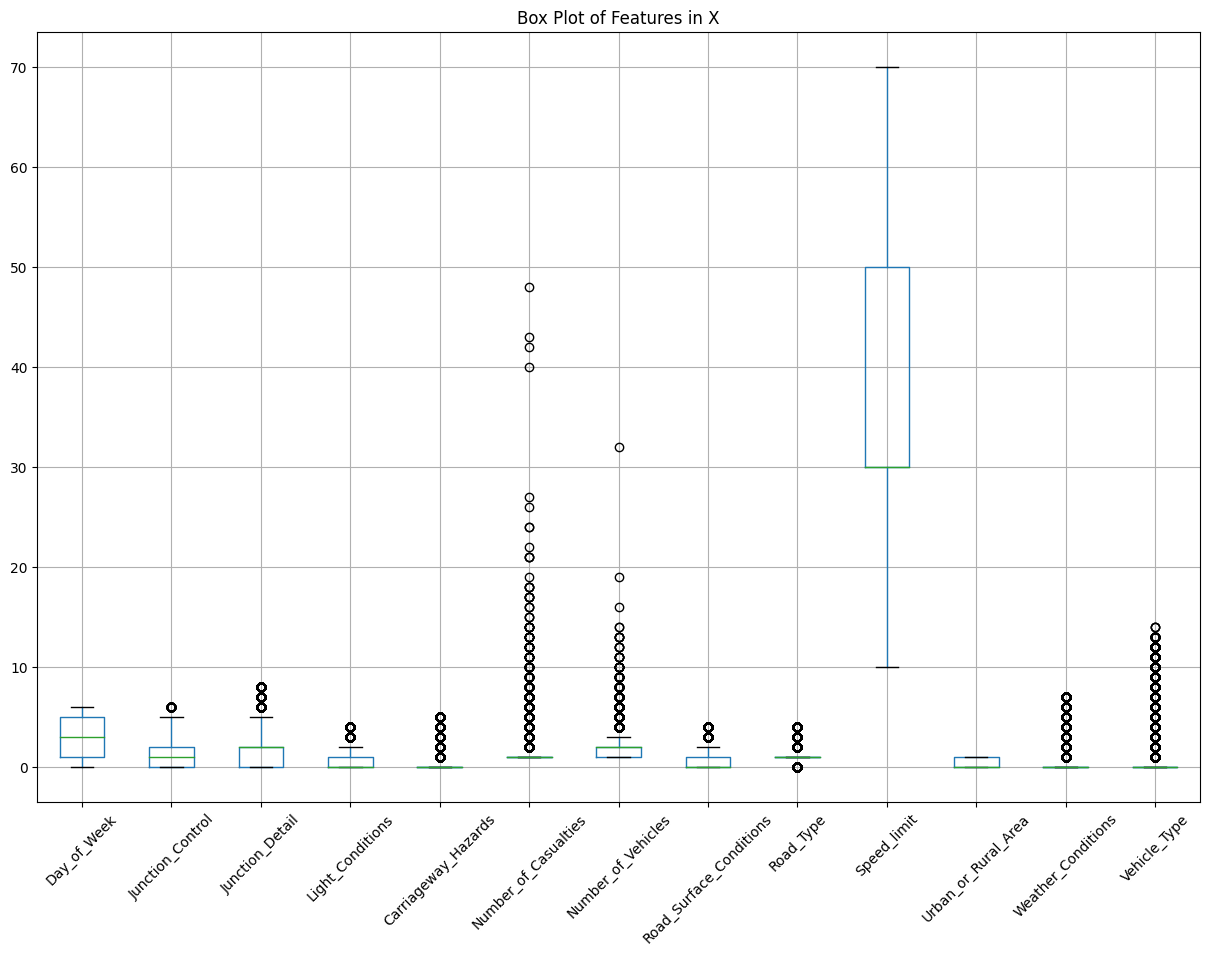

In [ ]:
# Visualizing Outliers using Box Plots
plt.figure(figsize=(15, 10))
X.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Features in X')
plt.show()

In [ ]:
# Function to detect outliers based on IQR
def detect_outliers(df):
    outlier_indices = []

    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_list_col = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = list(set(outlier_indices))
    return outlier_indices

# Detect outliers
outliers = detect_outliers(X)

# Print information about outliers
print(f"Number of Outliers Detected: {len(outliers)}")
print("Outliers Indices:", outliers)

Number of Outliers Detected: 209509
Outliers Indices: [0, 1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 16, 20, 21, 22, 23, 24, 25, 30, 32, 36, 38, 39, 40, 42, 43, 44, 45, 46, 51, 54, 55, 56, 57, 59, 62, 63, 66, 67, 69, 70, 71, 72, 74, 75, 80, 81, 84, 85, 87, 88, 93, 94, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 113, 119, 121, 124, 129, 131, 132, 133, 135, 139, 140, 142, 144, 145, 146, 147, 150, 151, 152, 153, 155, 158, 161, 162, 165, 166, 168, 169, 170, 173, 177, 178, 184, 185, 188, 194, 195, 197, 198, 199, 200, 201, 202, 204, 206, 207, 209, 212, 215, 216, 218, 222, 223, 228, 231, 232, 233, 234, 235, 237, 239, 240, 241, 242, 247, 256, 261, 262, 264, 265, 267, 269, 272, 275, 277, 280, 281, 285, 289, 290, 291, 295, 302, 306, 307, 308, 312, 314, 315, 318, 321, 322, 325, 327, 331, 334, 338, 339, 340, 342, 343, 344, 346, 348, 349, 350, 352, 353, 354, 356, 361, 362, 364, 367, 369, 370, 372, 374, 375, 377, 378, 380, 382, 383, 384, 385, 386, 389, 390, 391, 395, 397, 398, 405, 407, 408, 

In [ ]:
# Remove outliers from the DataFrame
X_cleaned = X.drop(outliers)

# If you also need to remove the corresponding rows from the target variable 'y'
y_cleaned = y.drop(outliers)

# Check the shape of the cleaned DataFrame
print("Shape of X after removing outliers:", X_cleaned.shape)
print("Shape of y after removing outliers:", y_cleaned.shape)

Shape of X after removing outliers: (98463, 13)
Shape of y after removing outliers: (98463,)


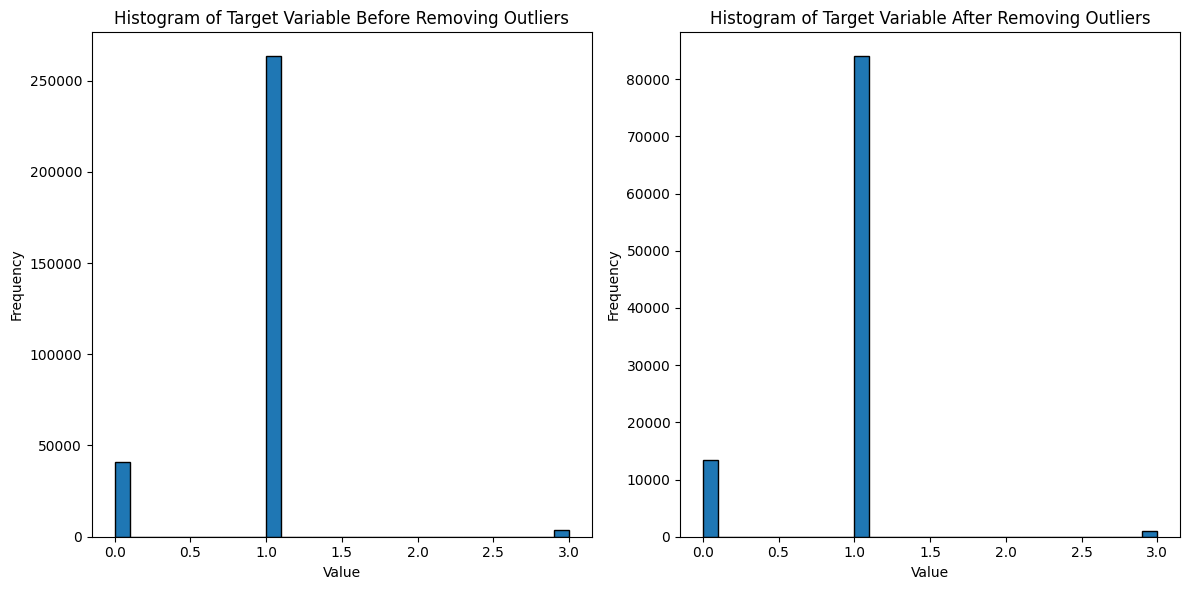

In [ ]:
import matplotlib.pyplot as plt

# Histogram before removing outliers in y
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(y, bins=30, edgecolor='black')
plt.title('Histogram of Target Variable Before Removing Outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram after removing outliers in y
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(y_cleaned, bins=30, edgecolor='black')
plt.title('Histogram of Target Variable After Removing Outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


X features before and after deeting the outliners

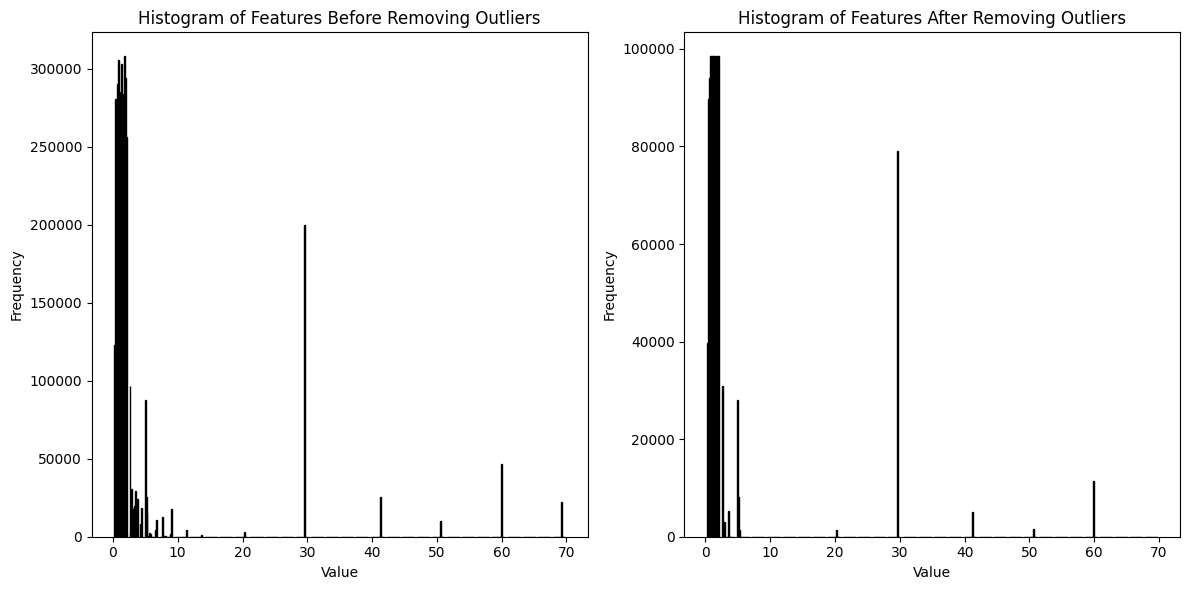

In [ ]:
import matplotlib.pyplot as plt

# Histogram before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(X, bins=30, edgecolor='black')
plt.title('Histogram of Features Before Removing Outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram after removing outliers
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(X_cleaned, bins=30, edgecolor='black')
plt.title('Histogram of Features After Removing Outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Correlation of numerical features with Accident Severity (After Removing Outliers):
Number_of_Vehicles         0.082503
Road_Surface_Conditions    0.016012
Day_of_Week               -0.004296
Light_Conditions          -0.006069
Junction_Detail           -0.009354
Junction_Control          -0.019226
Speed_limit               -0.021879
Urban_or_Rural_Area       -0.022421
Carriageway_Hazards             NaN
Number_of_Casualties            NaN
Road_Type                       NaN
Weather_Conditions              NaN
Vehicle_Type                    NaN
dtype: float64


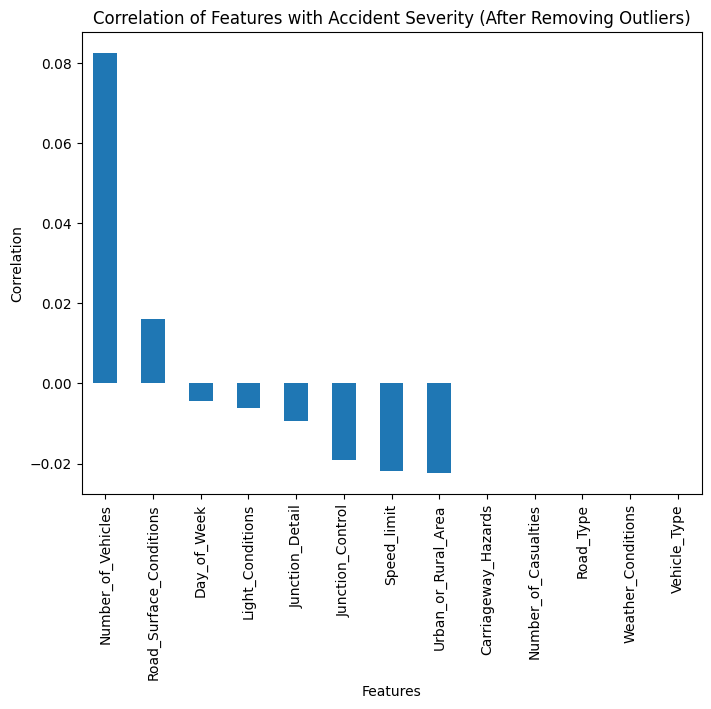


P-value from Chi-squared test for categorical features (After Removing Outliers):


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming 'X_cleaned' is your features DataFrame after removing outliers
# and 'y_cleaned' is the corresponding 'Accident_Severity' Series

# For numerical features, we can calculate the correlation with the target
correlations_cleaned = X_cleaned.corrwith(y_cleaned).sort_values(ascending=False)
print("Correlation of numerical features with Accident Severity (After Removing Outliers):")
print(correlations_cleaned)

# Plot correlation with the target variable
plt.figure(figsize=(8, 6))
correlations_cleaned.plot(kind='bar')
plt.title('Correlation of Features with Accident Severity (After Removing Outliers)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

# For categorical features, we can perform a Chi-squared test for independence
print("\nP-value from Chi-squared test for categorical features (After Removing Outliers):")
for column in X_cleaned.select_dtypes(include=['object', 'bool', 'category']).columns:
    # Create a cross-tabulation
    contingency_table_cleaned = pd.crosstab(X_cleaned[column], y_cleaned)

    # Perform the Chi-squared test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table_cleaned)

    # Print the p_value
    print(f"{column} (After Removing Outliers): p-value = {p_value}")

    # Plotting pointplot for categorical features
    plt.figure(figsize=(8, 4))
    sns.pointplot(x=y_cleaned, y=X_cleaned[column].astype('category').cat.codes)
    plt.title(f'Relationship between {column} and Accident Severity (After Removing Outliers, p-value = {p_value:.4f})')
    plt.xlabel('Accident Severity')
    plt.ylabel('Encoded ' + column)
    plt.show()


In [ ]:
# Check if any null values exist in y_cleaned
null_values_in_y = y_cleaned.isnull().any()
print("\nNull values in y_cleaned:")
print(null_values_in_y)

# If you want to know the count of null values
null_counts_in_y = y_cleaned.isnull().sum()
print("\nCount of Null values in y_cleaned:")
print(null_counts_in_y)



Null values in y_cleaned:
False

Count of Null values in y_cleaned:
0


In [ ]:
# Check if any null values exist in X_cleaned
null_values_in_X = X_cleaned.isnull().any()
print("Null values in X_cleaned:")
print(null_values_in_X)

# If you want to know the count of null values in each column
null_counts_in_X = X_cleaned.isnull().sum()
print("\nCount of Null values in each column of X_cleaned:")
print(null_counts_in_X)


Null values in X_cleaned:
Day_of_Week                False
Junction_Control           False
Junction_Detail            False
Light_Conditions           False
Carriageway_Hazards        False
Number_of_Casualties       False
Number_of_Vehicles         False
Road_Surface_Conditions    False
Road_Type                  False
Speed_limit                False
Urban_or_Rural_Area        False
Weather_Conditions         False
Vehicle_Type               False
dtype: bool

Count of Null values in each column of X_cleaned:
Day_of_Week                0
Junction_Control           0
Junction_Detail            0
Light_Conditions           0
Carriageway_Hazards        0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Speed_limit                0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64


Deleting the NAN values

In [ ]:
# Remove features with NaN correlations from the correlation series
correlations_cleaned = correlations_cleaned.dropna()

# Now print and plot the correlations again
print("Correlation of numerical features with Accident Severity (After Removing Outliers and NaN):")
print(correlations_cleaned)


Correlation of numerical features with Accident Severity (After Removing Outliers and NaN):
Number_of_Vehicles         0.082503
Road_Surface_Conditions    0.016012
Day_of_Week               -0.004296
Light_Conditions          -0.006069
Junction_Detail           -0.009354
Junction_Control          -0.019226
Speed_limit               -0.021879
Urban_or_Rural_Area       -0.022421
dtype: float64


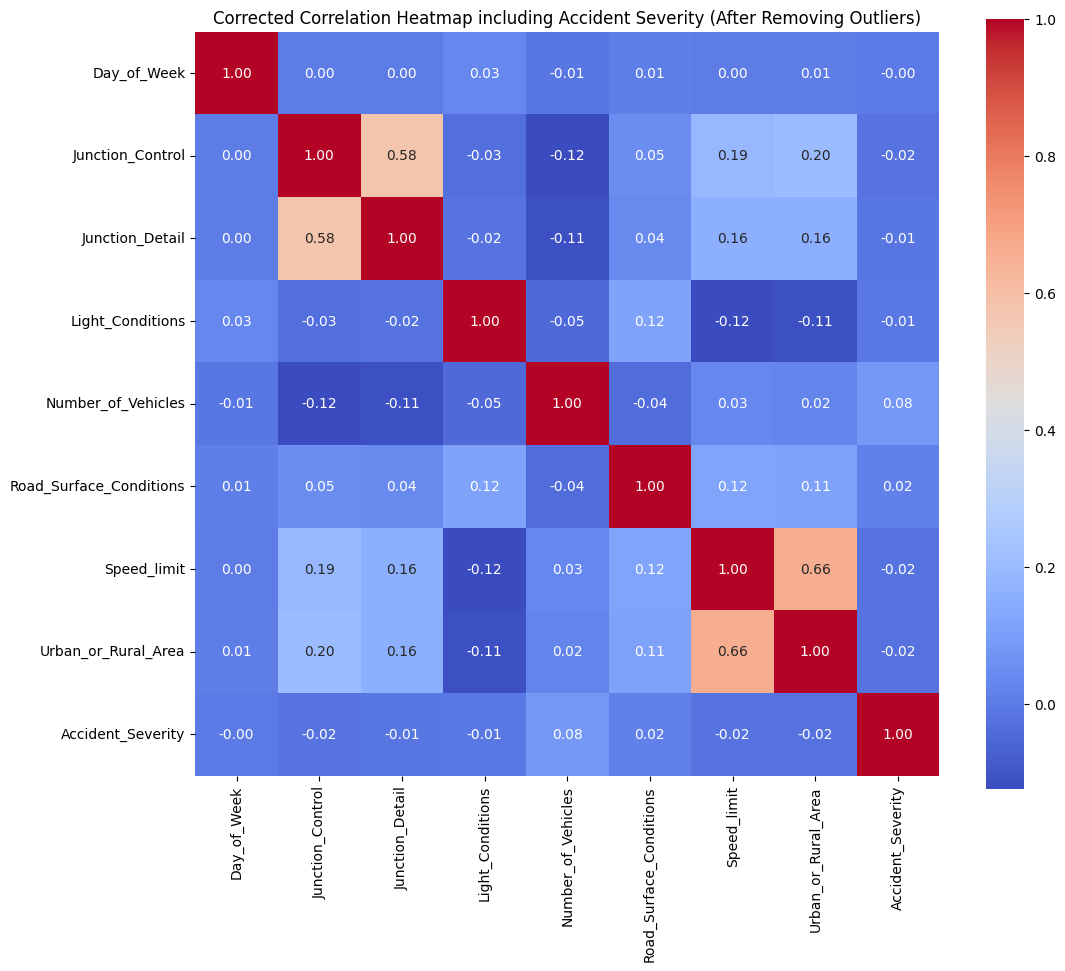

In [ ]:
# Add the cleaned target variable back to X_cleaned for the purpose of finding correlations
X_with_target_cleaned = X_cleaned.copy()
X_with_target_cleaned['Accident_Severity'] = y_cleaned

# Calculate the correlation matrix including the cleaned target variable
correlation_matrix_cleaned = X_with_target_cleaned.corr()

# Remove columns and rows with NaN values (if any) from the correlation matrix
correlation_matrix_cleaned = correlation_matrix_cleaned.dropna(axis=0, how='all').dropna(axis=1, how='all')


# Create the heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_cleaned, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Corrected Correlation Heatmap including Accident Severity (After Removing Outliers)')
plt.show()



Distribution of Numerical Features in X_with_target_cleaned:


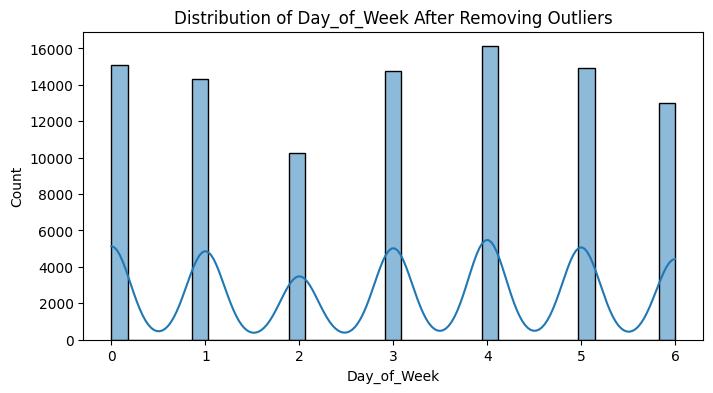

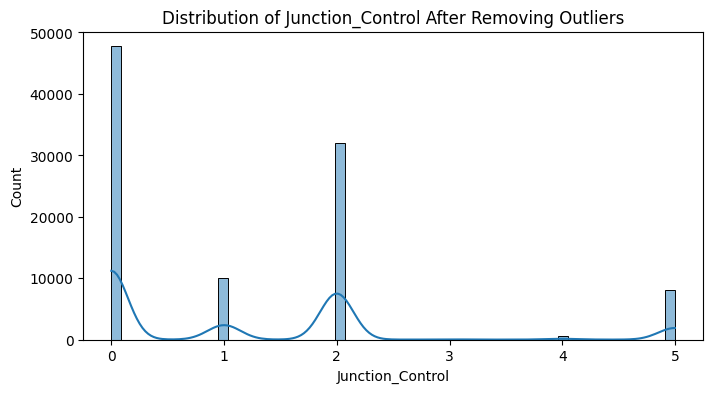

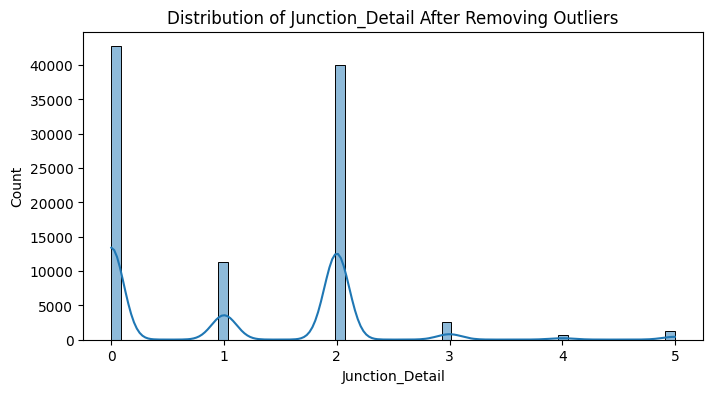

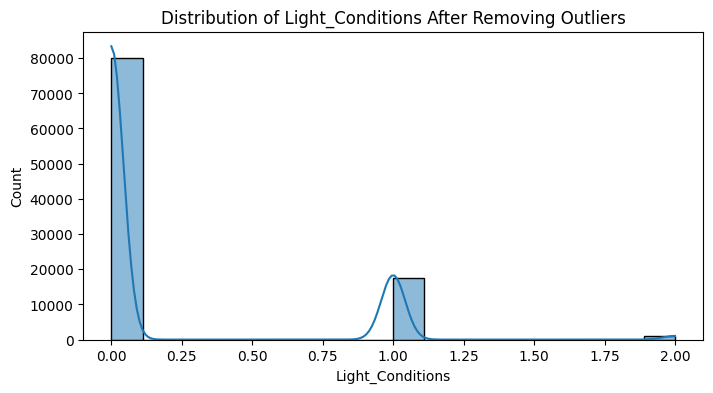

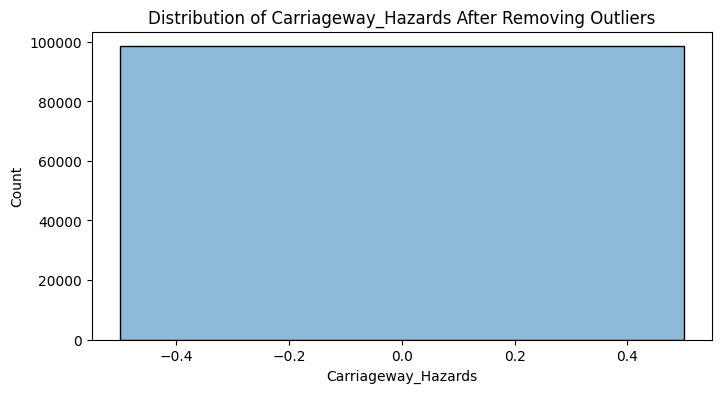

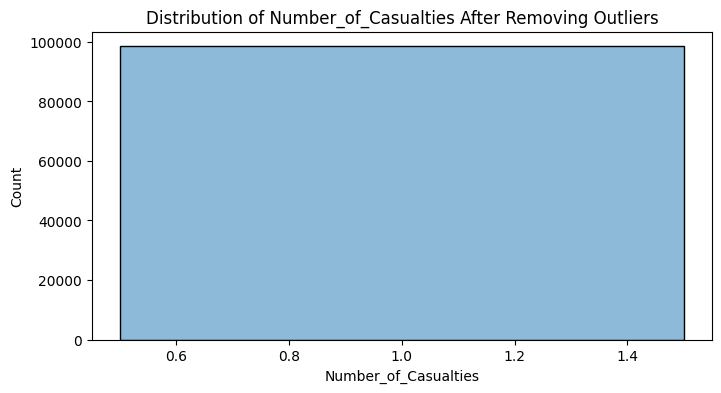

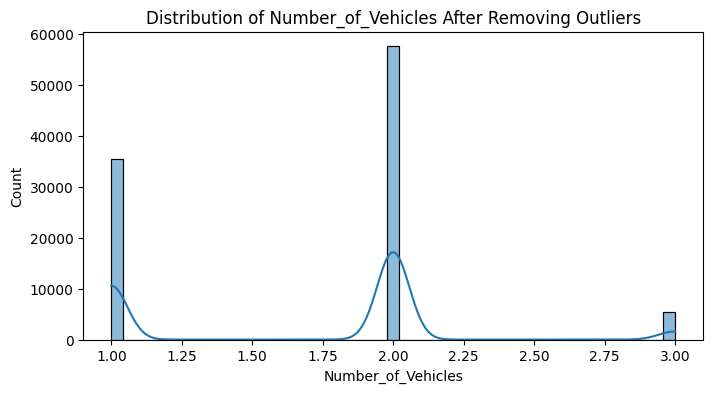

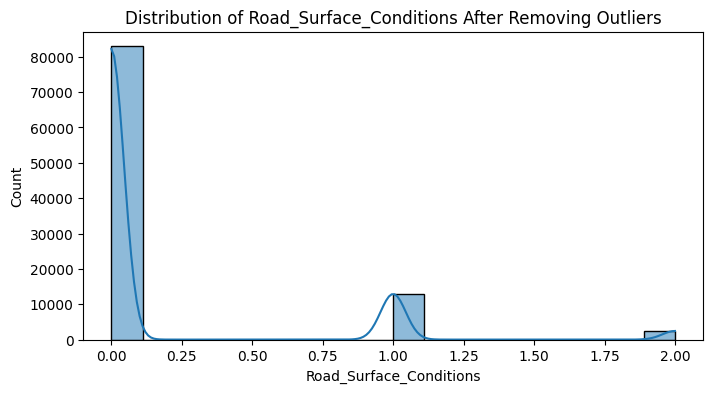

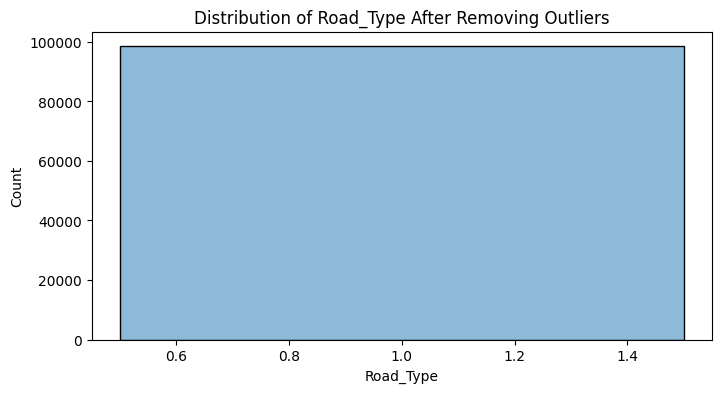

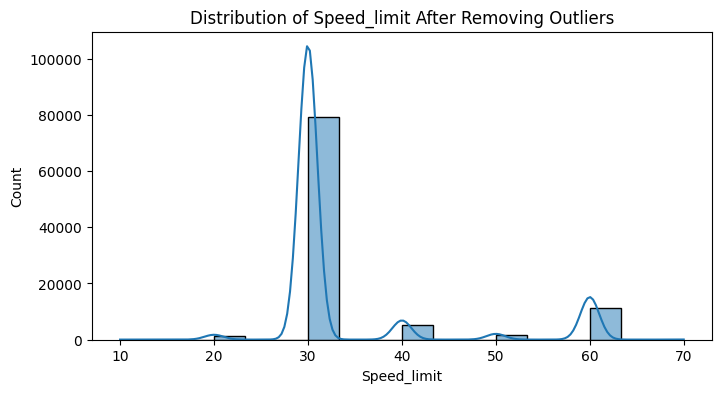

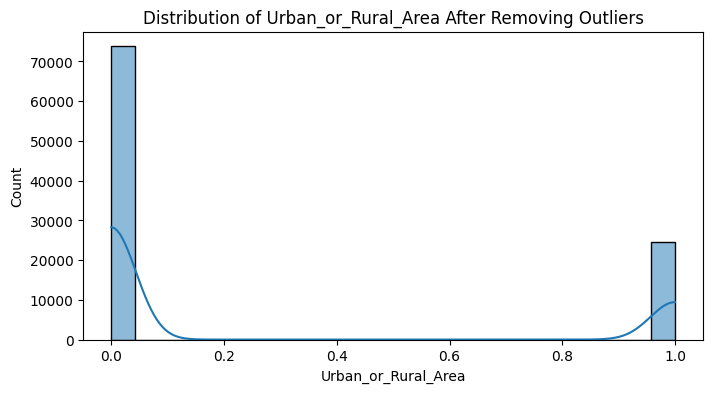

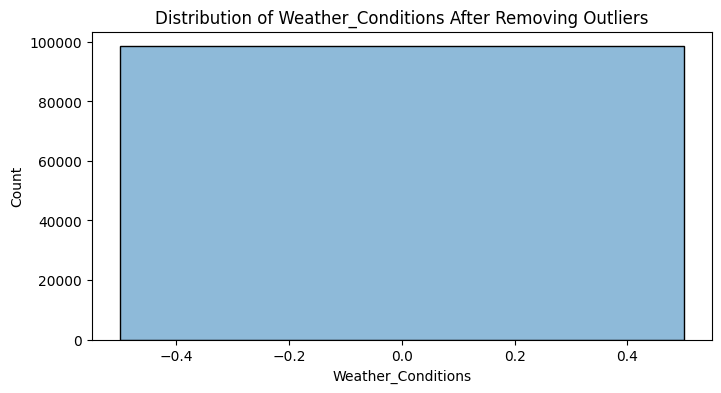

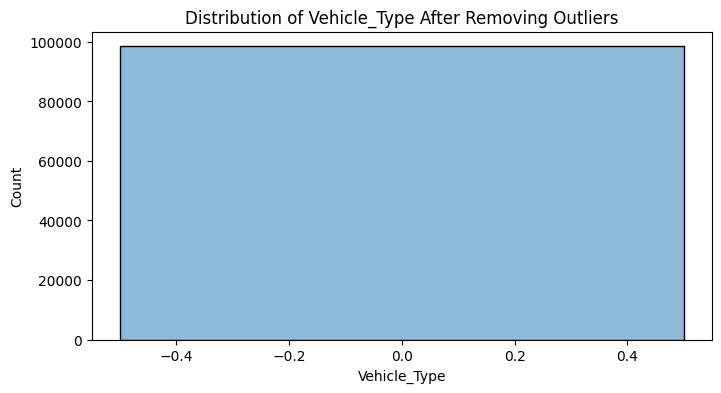

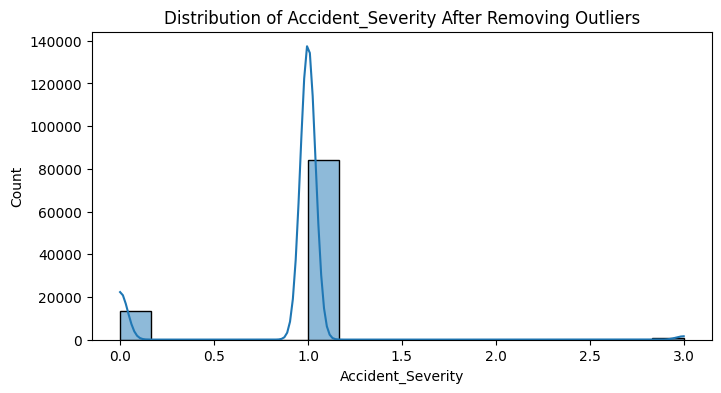

In [ ]:
# Distribution of numerical features in X_cleaned (after removing outliers)
print("\nDistribution of Numerical Features in X_with_target_cleaned:")
for column in X_with_target_cleaned.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_with_target_cleaned[column], kde=True)
    plt.title(f'Distribution of {column} After Removing Outliers')
    plt.show()



Relationship Between Features and Target Variable After Removing Outliers:


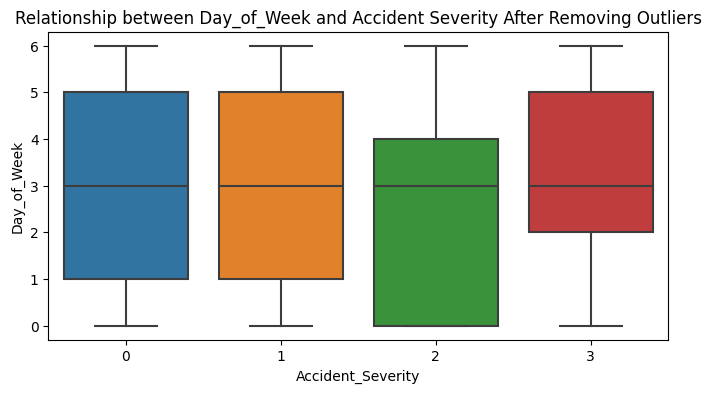

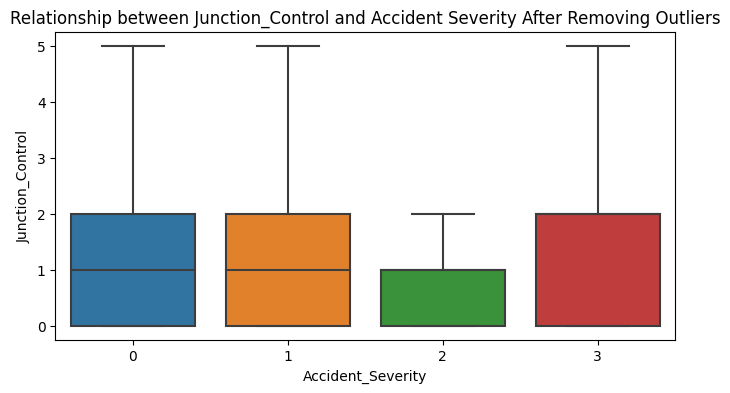

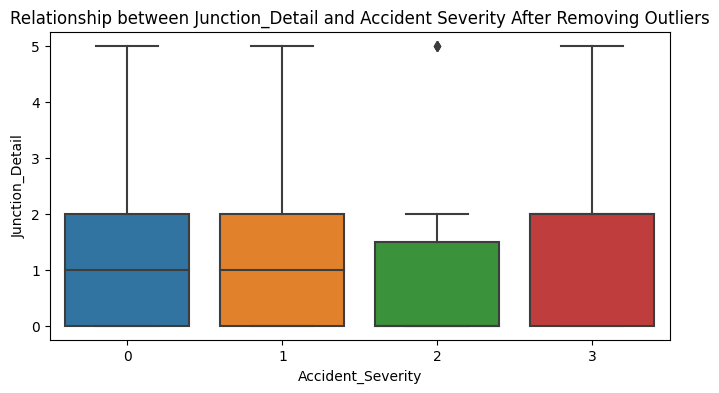

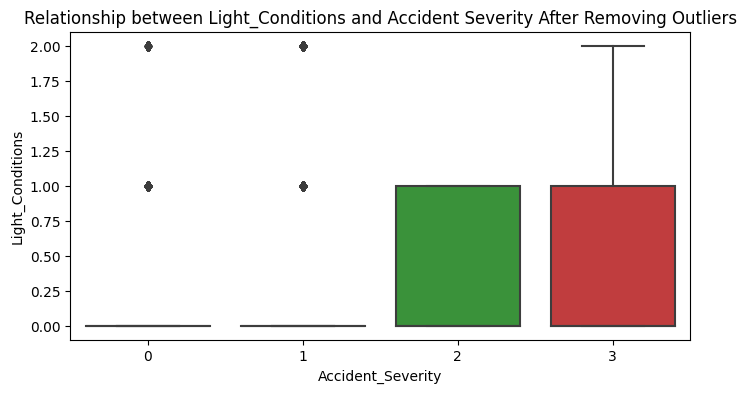

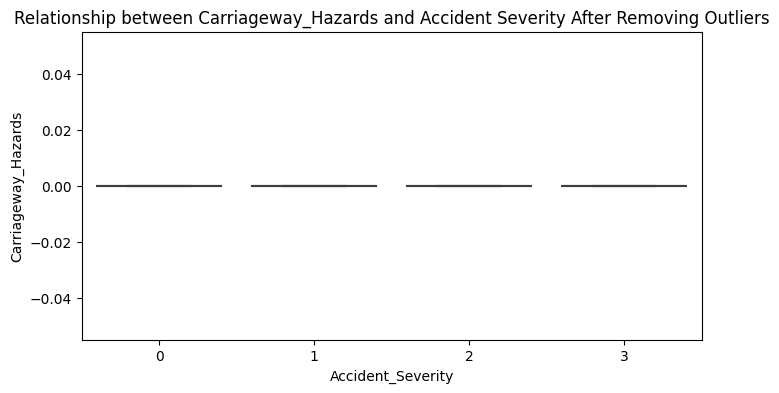

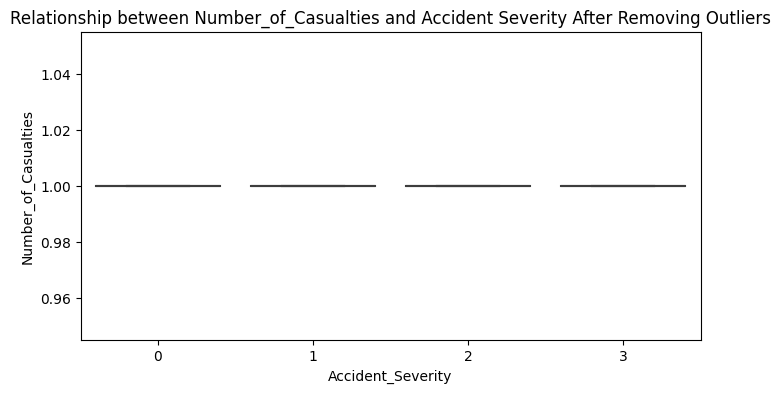

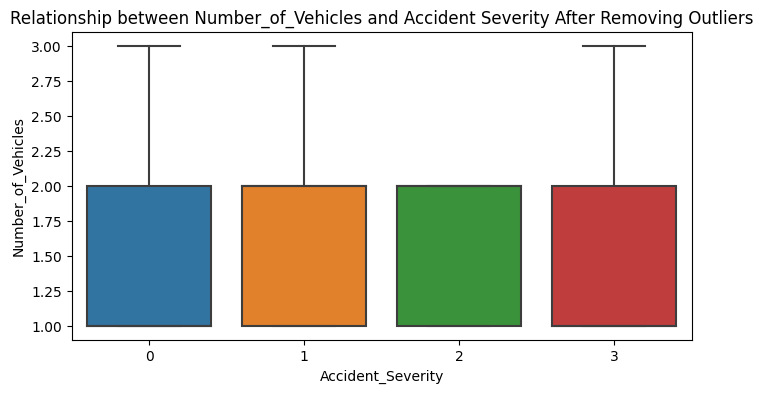

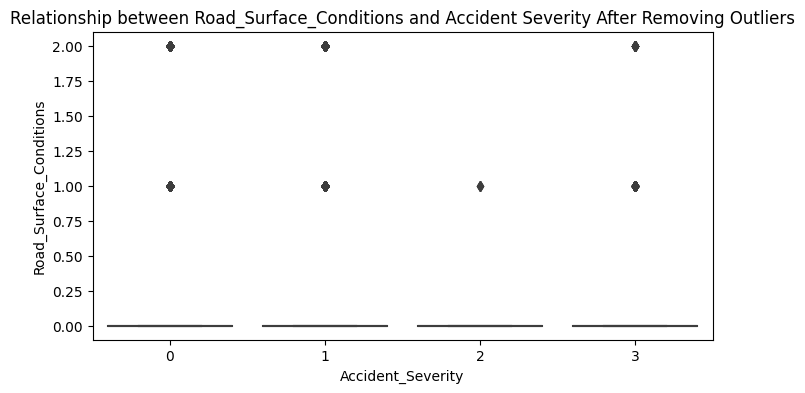

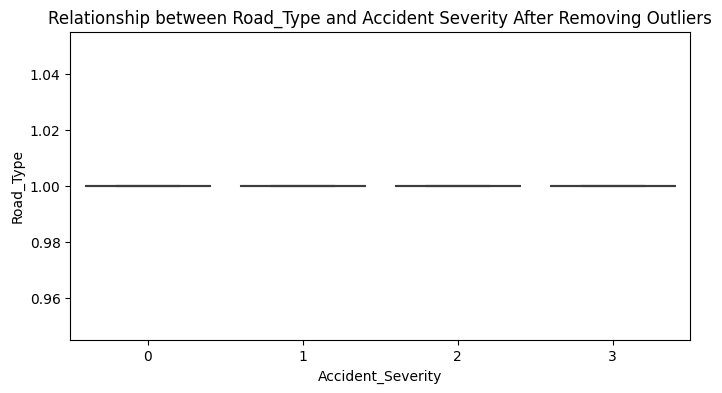

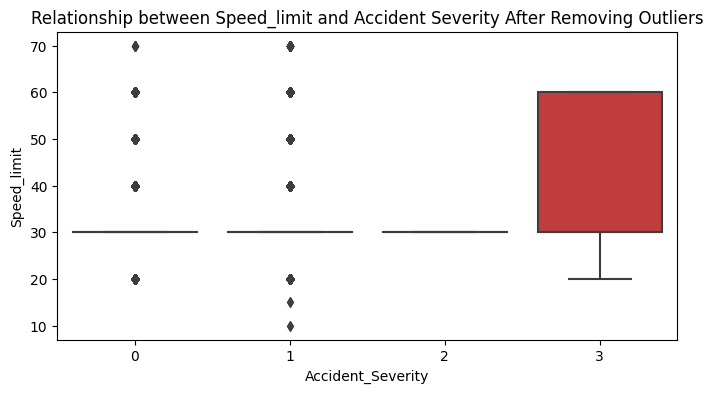

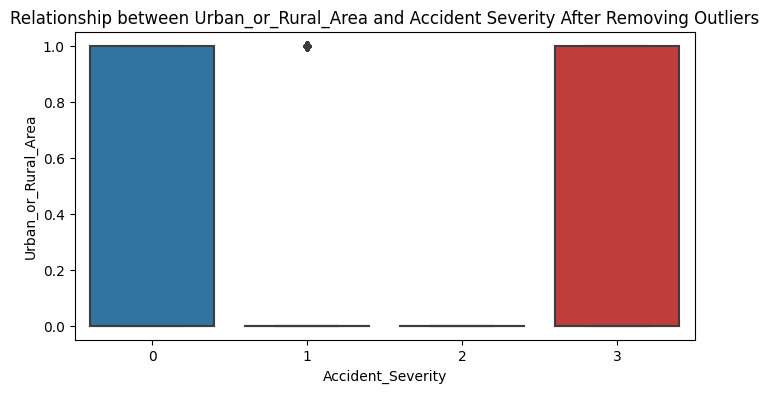

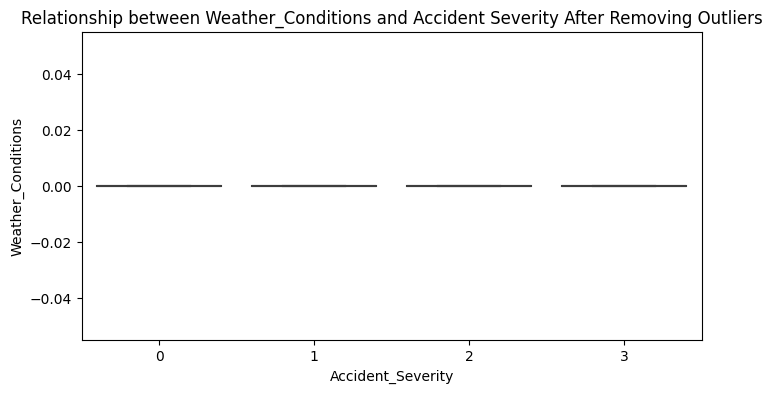

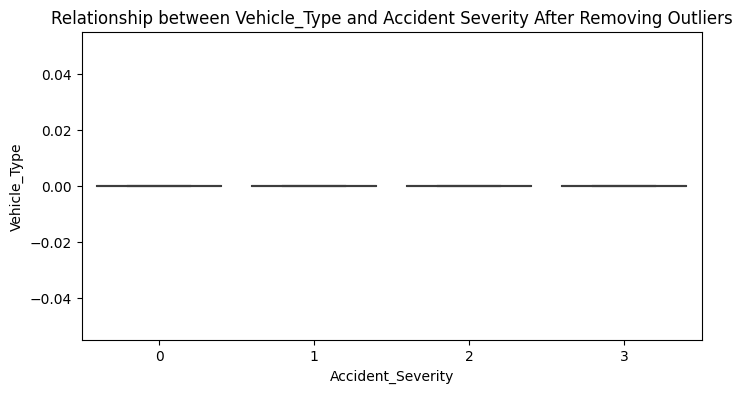

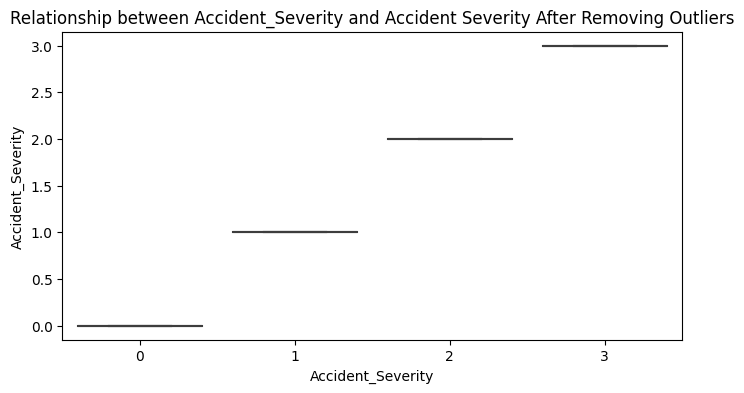

In [ ]:
# Analyzing the relationship between each feature in X_with_target_cleaned and the target variable y_cleaned
print("\nRelationship Between Features and Target Variable After Removing Outliers:")
for column in X_with_target_cleaned.columns:
    if X_with_target_cleaned[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=y_cleaned, y=X_with_target_cleaned[column])
        plt.title(f'Relationship between {column} and Accident Severity After Removing Outliers')
        plt.show()


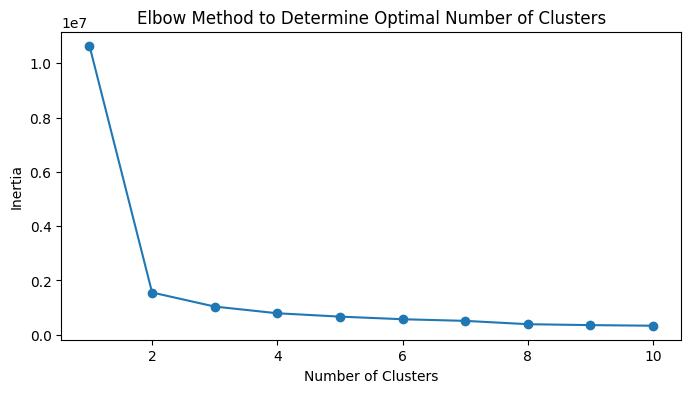

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X_cleaned' is your features DataFrame after removing outliers

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_cleaned)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the number of clusters (k) based on the Elbow Method plot
# and fit the KMeans algorithm to the data
k_optimal = 3  # This is just an example, you should choose the k based on the Elbow plot
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_cleaned)

# Add the cluster labels to your dataset
X_with_clusters = X_cleaned.copy()
X_with_clusters['Cluster'] = clusters


In [ ]:
# Check the shape of the cleaned DataFrame
print("Shape of X after removing outliers:", X_cleaned.shape)
print("Shape of y after removing outliers:", y_cleaned.shape)

Shape of X after removing outliers: (98463, 13)
Shape of y after removing outliers: (98463,)


SMOTE

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the features and target variable
X = X_cleaned.drop(['Weather_Conditions', 'Road_Type', 'Junction_Detail',
                              'Day_of_Week', 'Carriageway_Hazards', 'Vehicle_Type',
                              'Number_of_Casualties', 'Junction_Control',
                              'Urban_or_Rural_Area'], axis=1)
y = y_cleaned

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for many models and also helps with SMOTE)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Now, X_train_smote and y_train_smote can be used to train a machine learning model
print(X_train_smote.shape)
print(X_test_scaled.shape)
print(y_train_smote.shape)

(268956, 4)
(19693, 4)
(268956,)


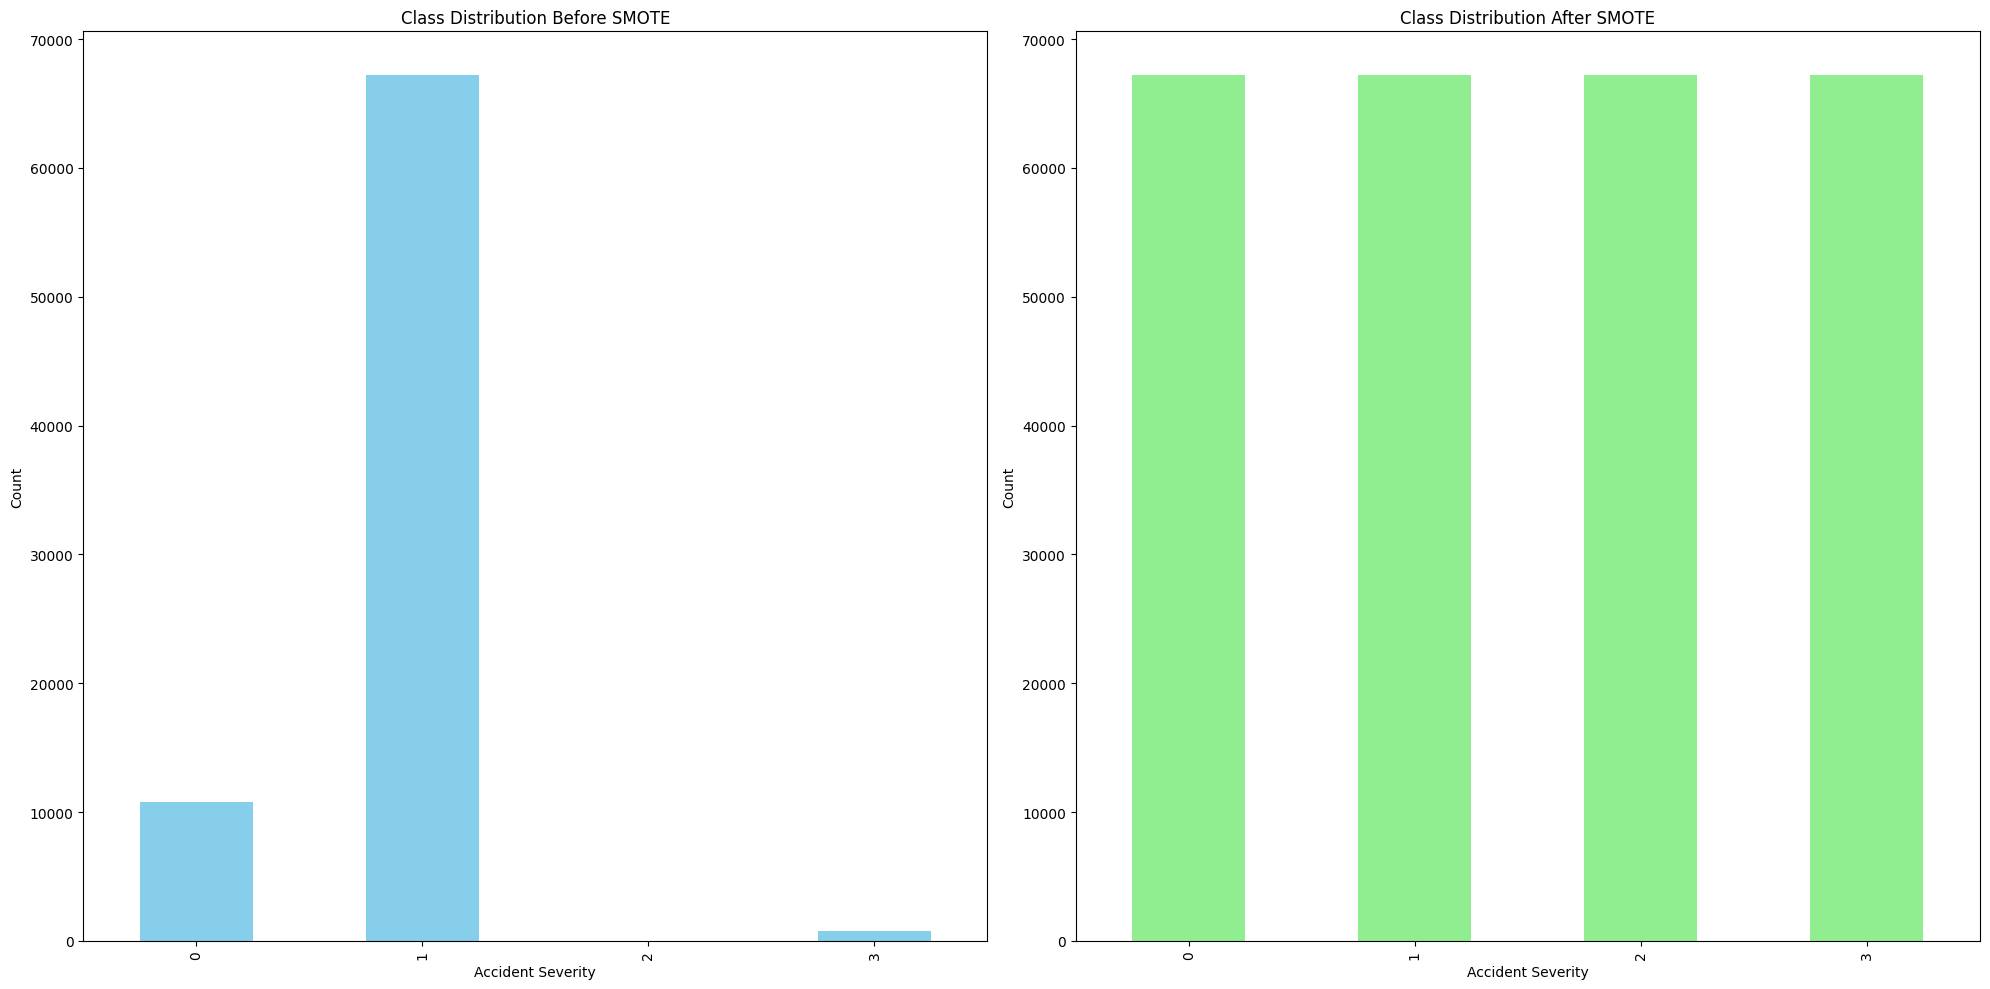

In [ ]:
# Plot the class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Before SMOTE
y_train.value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xlabel('Accident Severity')
axes[0].set_ylabel('Count')

# After SMOTE
y_train_smote.value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Class Distribution After SMOTE')
axes[1].set_xlabel('Accident Severity')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

PCA

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
# Apply PCA to the SMOTE-balanced training data
pca = PCA()
pca.fit(X_train_smote)


PCA()

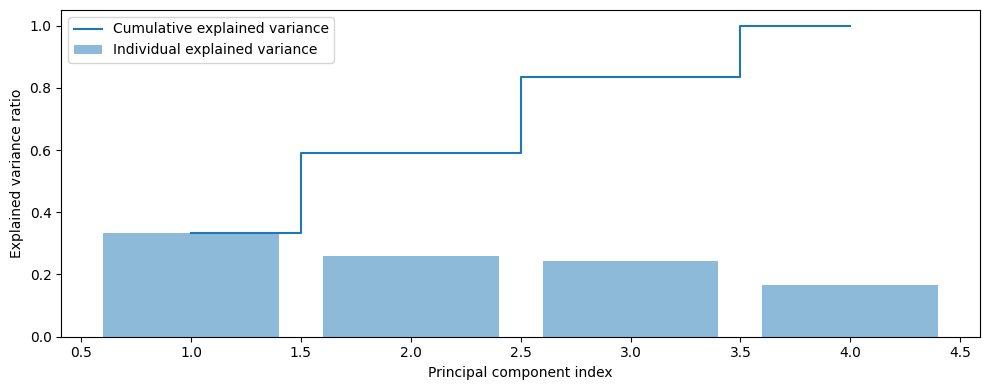

In [ ]:
# Calculate and visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 4))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Select the number of components based on cumulative explained variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test_scaled)

# Now X_train_pca and y_train_smote can be used to train a machine learning model
# X_test_pca and y_test can be used for model evaluation

In [ ]:
# Print the number of components used
print(f"Number of Principal Components used: {pca.n_components_}")

Number of Principal Components used: 4


In [ ]:
# This function identifies the elbow point
def find_elbow_point(cumulative_variance_ratio):
    differences = np.diff(cumulative_variance_ratio)
    elbows = np.where(differences < 0.01)[0]
    return elbows[0] + 1 if len(elbows) > 0 else np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Find and print the elbow point
elbow_point = find_elbow_point(cumulative_variance_ratio)
print(f"The elbow point is at component number: {elbow_point}")

The elbow point is at component number: 4


In [ ]:
# Access and print the 4th component
# Remember that Python uses 0-based indexing, so the 4th component is at index 10
fourth_component = pca.components_[3]
print("Values in the 4th PCA Component:\n", fourth_component)

Values in the 4th PCA Component:
 [-0.44098411  0.0625847   0.82470188 -0.34854409]


In [ ]:
# Print the columns in the DataFrames
print("Columns in X_train_pca:", X_train_pca.shape)
print("Columns in X_test_pca:", X_test_pca.shape)

# After verifying the correct column names, you can modify the `desired_columns` list accordingly


Columns in X_train_pca: (268956, 4)
Columns in X_test_pca: (19693, 4)


KNN

The optimal number of neighbors is 2


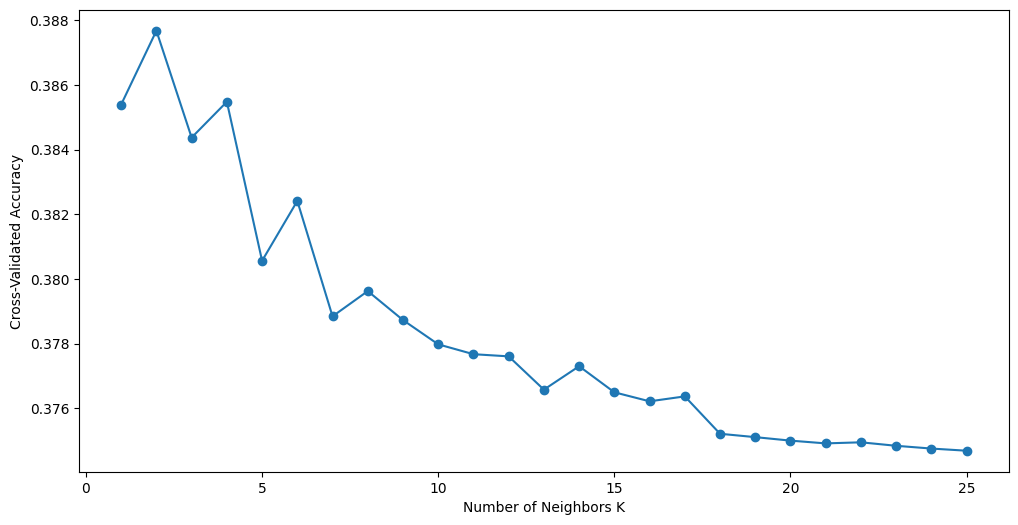

Accuracy: 0.14015132280505763
Precision: 0.6950350249765466
Recall: 0.14015132280505763
F1 Score: 0.171386530112693
Confusion Matrix: 
[[1037  380    0 1283]
 [8331 1632    0 6838]
 [   0    0    0    4]
 [  61   36    0   91]]
Classification report
              precision    recall  f1-score   support

           0       0.11      0.38      0.17      2700
           1       0.80      0.10      0.17     16801
           2       0.00      0.00      0.00         4
           3       0.01      0.48      0.02       188

    accuracy                           0.14     19693
   macro avg       0.23      0.24      0.09     19693
weighted avg       0.70      0.14      0.17     19693



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
import numpy as np

# Range of 'n_neighbors' to try
neighbors = range(1, 26)

# Empty list to store mean cross-validated scores
cv_scores = []

# Perform 10-fold cross-validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='ball_tree', metric='euclidean')
    scores = cross_val_score(knn, X_train_pca, y_train_smote, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Finding the optimal number of neighbors
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k}")

# Plot accuracy vs number of neighbors
plt.figure(figsize=(12, 6))
plt.plot(neighbors, cv_scores, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
import numpy as np

knn_model = KNeighborsClassifier(n_neighbors=2, weights='distance', algorithm='ball_tree',metric='euclidean')

knn_model.fit(X_train_pca, y_train_smote)

y_pred_knn = knn_model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Printing the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{conf_matrix}")
print("Classification report\n"+classification_report(y_test, y_pred_knn))

Accuracy: 0.648606103691667
Precision: 0.7647463614793306
Recall: 0.6486061036916672
F1 Score: 0.692602660204095
Confusion Matrix: 
[[ 1082  1644     0     8]
 [ 5045 11691     0    30]
 [    1     4     0     0]
 [   87   101     0     0]]
Classification report
              precision    recall  f1-score   support

           0       0.17      0.40      0.24      2734
           1       0.87      0.70      0.77     16766
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00       188

    accuracy                           0.65     19693
   macro avg       0.26      0.27      0.25     19693
weighted avg       0.76      0.65      0.69     19693



XG-Boosting

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create an XGBoost model (with default parameters as an example)
xgb_model = XGBClassifier()

# Train the model on your training data
xgb_model.fit(X_train_pca, y_train_smote)

# Make predictions on your test data
y_pred = xgb_model.predict(X_test_pca)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.04      0.07      2734
           1       0.89      0.59      0.71     16766
           2       0.00      0.00      0.00         5
           3       0.02      0.51      0.05       188

    accuracy                           0.51     19693
   macro avg       0.27      0.29      0.21     19693
weighted avg       0.78      0.51      0.62     19693

[[ 118 1161  700  755]
 [ 686 9920 3204 2956]
 [   1    2    0    2]
 [  11   39   43   95]]


Random Forest

In [ ]:
# implemented random forest using different parameteres
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier(max_depth=5,n_estimators=50)
clf_rf.fit(X_train_pca,y_train_smote)
y_pred=clf_rf.predict(X_test_pca)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.15      0.04      0.06      2734
           1       0.89      0.59      0.71     16766
           2       0.00      0.00      0.00         5
           3       0.02      0.52      0.05       188

    accuracy                           0.51     19693
   macro avg       0.27      0.29      0.20     19693
weighted avg       0.78      0.51      0.61     19693

[[ 100 1160  707  767]
 [ 550 9868 3242 3106]
 [   1    2    0    2]
 [   6   40   44   98]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier(max_depth=5,n_estimators=250)
clf_rf.fit(X_train_pca,y_train_smote)
y_pred=clf_rf.predict(X_test_pca)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.15      0.04      0.06      2734
           1       0.89      0.59      0.71     16766
           2       0.00      0.00      0.00         5
           3       0.02      0.52      0.05       188

    accuracy                           0.51     19693
   macro avg       0.27      0.29      0.20     19693
weighted avg       0.78      0.51      0.61     19693

[[ 103 1154  709  768]
 [ 580 9813 3258 3115]
 [   1    2    0    2]
 [   6   40   44   98]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier(max_depth=8,n_estimators=250)
clf_rf.fit(X_train_pca,y_train_smote)
y_pred=clf_rf.predict(X_test_pca)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.15      0.04      0.06      2734
           1       0.89      0.59      0.71     16766
           2       0.00      0.00      0.00         5
           3       0.03      0.52      0.05       188

    accuracy                           0.52     19693
   macro avg       0.27      0.29      0.21     19693
weighted avg       0.78      0.52      0.62     19693

[[ 107 1167  700  760]
 [ 594 9972 3203 2997]
 [   1    2    0    2]
 [   6   42   43   97]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier(max_depth=8,n_estimators=350)
clf_rf.fit(X_train_pca,y_train_smote)
y_pred=clf_rf.predict(X_test_pca)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.15      0.04      0.06      2734
           1       0.89      0.59      0.71     16766
           2       0.00      0.00      0.00         5
           3       0.03      0.52      0.05       188

    accuracy                           0.52     19693
   macro avg       0.27      0.29      0.21     19693
weighted avg       0.78      0.52      0.62     19693

[[ 107 1167  700  760]
 [ 592 9973 3204 2997]
 [   1    2    0    2]
 [   6   42   43   97]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier(max_depth=50,n_estimators=550)
clf_rf.fit(X_train_pca,y_train_smote)
y_pred=clf_rf.predict(X_test_pca)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.15      0.05      0.08      2734
           1       0.89      0.59      0.71     16766
           2       0.00      0.00      0.00         5
           3       0.03      0.50      0.05       188

    accuracy                           0.52     19693
   macro avg       0.27      0.29      0.21     19693
weighted avg       0.78      0.52      0.62     19693

[[ 142 1165  700  727]
 [ 815 9941 3204 2806]
 [   1    2    0    2]
 [  11   40   43   94]]


gridsearchcv to find the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid to search over
param_grid = {
    'max_depth': [10, 20, 30],
    'n_estimators': [100, 200, 300],
    # Add more parameters to search over if needed
}

# Create the Random Forest classifier
clf_rf = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator (model) obtained from the grid search
best_clf_rf = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_clf_rf.predict(X_test_scaled)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.04      0.07      2734
           1       0.89      0.59      0.71     16766
           2       0.00      0.00      0.00         5
           3       0.03      0.51      0.05       188

    accuracy                           0.51     19693
   macro avg       0.27      0.29      0.21     19693
weighted avg       0.78      0.51      0.62     19693

Confusion Matrix:
[[ 116 1161  700  757]
 [ 666 9920 3203 2977]
 [   1    2    0    2]
 [  10   39   43   96]]


In [ ]:
#implemented with best parameters found using gridsearch cross validation
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier(max_depth=10,n_estimators=100)
clf_rf.fit(X_train_pca,y_train_smote)
y_pred=clf_rf.predict(X_test_scaled)
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.16      0.04      0.06      2734
           1       0.85      0.06      0.11     16766
           2       0.00      0.00      0.00         5
           3       0.01      0.85      0.02       188

    accuracy                           0.06     19693
   macro avg       0.25      0.24      0.05     19693
weighted avg       0.75      0.06      0.10     19693

[[  103   156   142  2333]
 [  539   995  1236 13996]
 [    0     1     0     4]
 [    7    17     5   159]]


In [ ]:
#k-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

clf_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Set the number of folds for cross-validation (e.g., k=5 for 5-fold cross-validation)
k_fold = 5

# Perform K-fold cross-validation
cross_val_scores = cross_val_score(clf_rf, X_train_smote, y_train_smote, cv=k_fold, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Print the mean and standard deviation of the cross-validation scores
print(f"Mean Accuracy: {np.mean(cross_val_scores):.4f}")
print(f"Standard Deviation: {np.std(cross_val_scores):.4f}")

Cross-Validation Scores: [0.4578376  0.46403673 0.46161997 0.46338607 0.46206614]
Mean Accuracy: 0.4618
Standard Deviation: 0.0022


SVM:

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Create an SVM model (with default parameters as an example)
svm_model = SVC(kernel='rbf', C=100, gamma = 0.1 , decision_function_shape='ovr')

# Train the model on your training data
svm_model.fit(X_train_pca, y_train_smote)

# Make predictions on your test data
y_pred = svm_model.predict(X_test_pca)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.14      0.04      0.07      2734
           1       0.89      0.59      0.71     16766
           2       0.00      0.00      0.00         5
           3       0.03      0.52      0.05       188

    accuracy                           0.51     19693
   macro avg       0.27      0.29      0.21     19693
weighted avg       0.78      0.51      0.61     19693

[[ 118 1153  700  763]
 [ 687 9867 3203 3009]
 [   1    2    0    2]
 [  10   38   43   97]]
